
implementing the libraries
---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

importing training set

In [ ]:
dataset_train=pd.read_excel("cov19_train.xlsx")
dataset_train.head()

,Lat,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2020-01-02 00:00:00,2020-02-02 00:00:00,2020-03-02 00:00:00,2020-04-02 00:00:00,2020-05-02 00:00:00,2020-06-02 00:00:00,2020-07-02 00:00:00,2020-08-02 00:00:00,2020-09-02 00:00:00,2020-10-02 00:00:00,2020-11-02 00:00:00,2020-12-02 00:00:00,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,2020-01-12 00:00:00,2020-02-12 00:00:00,2020-03-12 00:00:00,2020-04-12 00:00:00,2020-05-12 00:00:00,2020-06-12 00:00:00,2020-07-12 00:00:00,2020-08-12 00:00:00,2020-09-12 00:00:00,2020-10-12 00:00:00,2020-11-12 00:00:00,2020-12-12 00:00:00,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,67709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,43035,43240,43468,43681,43924,44177,44363,44503,44706,44988,45174,45384,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433
1,Albania,201683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27233,27830,28432,29126,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317
2,Algeria,16596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,66819,67679,68589,69591,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549
3,Andorra,15218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5725,5872,5914,5951,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669
4,Angola,178739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13374,13451,13615,13818,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931


In [ ]:
dataset_train=dataset_train.T
dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
Lat,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,67709953,201683,16596,15218,178739,-617964,-636167,450382,1490124,1512093,1308456,1530251,1386007,1473272,1449631,1158605,145501,475769,-78035889,50.55,903563,-595432,279534,4469936,-884976,23158,904336,-635887,176791,246849,-519253,1147277,254858,-15616,95956,299189,-230418,1049167,115021,-1165765,...,-374922,80771797,302176,-560278,18643501,82275,38996815,121.0,712761,34888822,100992541,125727539,0.8248,-612225,9537499,352433,-100.0,32290275,311656,53847818,-630686,-647505,-64.64,-812546,-23644,-595236,-53536,-45481,-62187366,-717979,-3436,-557658,64585262,1669592,-665897,108277199,352332,48516388,27849332,29154857
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [ ]:
training_set=dataset_train.iloc[1:, 247:248]
training_set.head()

,247
1/22/20,352433
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [ ]:
training_set=dataset_train.iloc[1:, 247:248].values

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

Creating the Data Structure with Time Steps

In [ ]:
x_train=[]
y_train=[]
for i in range (10,338):
  x_train.append(training_set_scaled[i-10:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

Reshaping

In [ ]:
x_train=np.reshape(x_train, (x_train.shape[0],
                             x_train.shape[1],
                             1))

Building the RNN

importing keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

initializing RNN

In [ ]:
regressor=Sequential()

Adding First Layer

In [ ]:
regressor.add(SimpleRNN(units = 8,activation='tanh', 
                        return_sequences = True, 
                        input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Yeni Bölüm

Adding Second Layer

In [ ]:
regressor.add(SimpleRNN(units = 8,activation='tanh', 
                        return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(SimpleRNN(units = 8))  
regressor.add(Dropout(0.2))

Adding Output Layer

In [ ]:
regressor.add(Dense(units=1))

Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to training set

In [ ]:
regressor.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
11/11 [==============================] - 2s 7ms/step - loss: 0.6216
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2351
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1834
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2175
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1473
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1389
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1321
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1133
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0924
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1068
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1016
Epoch 12/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0687
Epoch 13/100
11/11 [=================

Making the Predictions and Visualizing the Results

In [ ]:
dataset_test=pd.read_excel("cov19_test.xlsx")
dataset_test.head()

,Lat,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,01/01/2021,01/02/2020,01/03/2020,01/04/2020,01/05/2020
0,Afghanistan,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011
1,Albania,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623
2,Algeria,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645
3,Andorra,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249
4,Angola,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684


In [ ]:
dataset_test=dataset_test.T
dataset_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
Lat,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/25/20,50655,54827,97007,7699,17029,154,1563865,156142,118,4832,73,1240,568,234,20361,848,347204,210061,7788,91070,506102,345,181113,634904,10490,3205,519,153121,108298,14025,7423945,152,196658,5941,119788,773,11688,363,26277,94788,...,1854951,39231,23316,5810,396048,428197,10701,776,13106,509,5910,41,3520,7089,126752,2100712,18665343,32914,1030125,198435,11,560,86,318,2880,29,1476,374,13,810,2188587,15457,76456,1,111245,1432,129080,2092,19234,12786
12/26/20,50810,55380,97441,7756,17099,155,1574554,156763,118,4847,73,1241,569,234,20361,854,349055,211764,7788,91304,507265,347,183006,637246,10490,3205,576,153590,108891,14025,7448560,152,196915,6134,120546,786,11696,363,26277,95979,...,1854951,39782,23316,5880,396048,428197,10821,780,13138,509,6020,41,3546,7097,128578,2118255,18765529,33360,1041583,199665,11,561,86,318,2880,29,1534,374,13,829,2221312,15848,76568,1,111603,1439,130598,2092,19571,12880
12/27/20,50886,55755,97857,7806,17149,155,1578267,157349,118,4858,73,1241,569,234,20362,853,350484,213192,7788,91518,508099,352,184922,638030,10490,3205,597,154349,109330,14025,7465806,152,197384,6255,121280,786,11698,364,26277,96893,...,1854951,40380,23316,5938,396048,428197,10932,783,13172,509,6123,41,3555,7104,130230,2133373,18992126,33563,1049717,200892,12,581,86,318,2880,29,1593,374,13,844,2256005,16218,76666,1,111951,1440,131904,2092,19671,12963
12/28/20,51039,56254,98249,7821,17240,155,1583297,157834,118,4872,73,1246,572,234,20364,858,351892,214711,7834,91733,509148,356,186747,638877,10561,3205,623,154843,109691,14025,7484285,152,197716,6344,121886,804,11714,364,26277,97352,...,1854951,41054,23316,5978,396048,428197,11033,785,13205,509,6141,41,3555,7112,131592,2147578,19142603,33811,1056265,201836,12,581,86,318,2960,29,1661,374,13,849,2288345,16728,76751,1,112316,1441,133093,2094,19834,13077


In [ ]:
real_set=dataset_test.iloc[1:, 247:248]
real_set.head()

,247
12/25/20,2100712
12/26/20,2118255
12/27/20,2133373
12/28/20,2147578
12/29/20,2162775


In [ ]:
real_set=dataset_test.iloc[1:, 247:248].values

Predicted the next days 

In [ ]:
dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
Lat,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,67709953,201683,16596,15218,178739,-617964,-636167,450382,1490124,1512093,1308456,1530251,1386007,1473272,1449631,1158605,145501,475769,-78035889,50.55,903563,-595432,279534,4469936,-884976,23158,904336,-635887,176791,246849,-519253,1147277,254858,-15616,95956,299189,-230418,1049167,115021,-1165765,...,-374922,80771797,302176,-560278,18643501,82275,38996815,121.0,712761,34888822,100992541,125727539,0.8248,-612225,9537499,352433,-100.0,32290275,311656,53847818,-630686,-647505,-64.64,-812546,-23644,-595236,-53536,-45481,-62187366,-717979,-3436,-557658,64585262,1669592,-665897,108277199,352332,48516388,27849332,29154857
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [ ]:
dataset_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271
Lat,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
12/25/20,50655,54827,97007,7699,17029,154,1563865,156142,118,4832,73,1240,568,234,20361,848,347204,210061,7788,91070,506102,345,181113,634904,10490,3205,519,153121,108298,14025,7423945,152,196658,5941,119788,773,11688,363,26277,94788,...,1854951,39231,23316,5810,396048,428197,10701,776,13106,509,5910,41,3520,7089,126752,2100712,18665343,32914,1030125,198435,11,560,86,318,2880,29,1476,374,13,810,2188587,15457,76456,1,111245,1432,129080,2092,19234,12786
12/26/20,50810,55380,97441,7756,17099,155,1574554,156763,118,4847,73,1241,569,234,20361,854,349055,211764,7788,91304,507265,347,183006,637246,10490,3205,576,153590,108891,14025,7448560,152,196915,6134,120546,786,11696,363,26277,95979,...,1854951,39782,23316,5880,396048,428197,10821,780,13138,509,6020,41,3546,7097,128578,2118255,18765529,33360,1041583,199665,11,561,86,318,2880,29,1534,374,13,829,2221312,15848,76568,1,111603,1439,130598,2092,19571,12880
12/27/20,50886,55755,97857,7806,17149,155,1578267,157349,118,4858,73,1241,569,234,20362,853,350484,213192,7788,91518,508099,352,184922,638030,10490,3205,597,154349,109330,14025,7465806,152,197384,6255,121280,786,11698,364,26277,96893,...,1854951,40380,23316,5938,396048,428197,10932,783,13172,509,6123,41,3555,7104,130230,2133373,18992126,33563,1049717,200892,12,581,86,318,2880,29,1593,374,13,844,2256005,16218,76666,1,111951,1440,131904,2092,19671,12963
12/28/20,51039,56254,98249,7821,17240,155,1583297,157834,118,4872,73,1246,572,234,20364,858,351892,214711,7834,91733,509148,356,186747,638877,10561,3205,623,154843,109691,14025,7484285,152,197716,6344,121886,804,11714,364,26277,97352,...,1854951,41054,23316,5978,396048,428197,11033,785,13205,509,6141,41,3555,7112,131592,2147578,19142603,33811,1056265,201836,12,581,86,318,2960,29,1661,374,13,849,2288345,16728,76751,1,112316,1441,133093,2094,19834,13077


In [ ]:
dataset_total=pd.concat([dataset_train, dataset_test.iloc[1:, :]],axis=0).iloc[1:,247:248]

In [ ]:
dataset_total.rename(columns={dataset_total.columns[0]:"Turkey"},inplace=True)
dataset_total.head()

,Turkey
1/22/20,352433
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-10:].values

In [ ]:
inputs=inputs.reshape(-1,1)
inputs

array([[1836728],
       [1866345],
       [1898447],
       [1928165],
       [1955680],
       [1982090],
       [2004285],
       [2024601],
       [2043704],
       [2062960],
       [2082610],
       [2100712],
       [2118255],
       [2133373],
       [2147578],
       [2162775],
       [2178580],
       [2194272],
       [2208652],
       [2220855],
       [2232035],
       [2241912],
       [2255607]], dtype=object)

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
x_test=[]
for i in range (10,22):
  x_test.append(inputs[i-10:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_set=regressor.predict(x_test)
predicted_set=sc.inverse_transform(predicted_set)

Visualizing

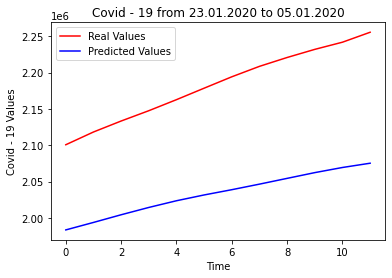

In [ ]:
plt.plot(real_set, color="red",label="Real Values")
plt.plot(predicted_set, color="blue", label="Predicted Values")
plt.title("Covid - 19 from 23.01.2020 to 05.01.2020")
plt.xlabel("Time")
plt.ylabel("Covid - 19 Values")
plt.legend()
plt.show()